# Model Analytics Project 2018

**Author: Herman Dempere**

Data filtering and several models evaluated.


In [1]:
import pandas as pd
import numpy as np
import random as rand
import sklearn.metrics as metrics
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

## Labels and Codes

In [2]:
# Informatica
s1_info = [364288, 364289, 364290, 364291, 364292, 364293, 364294, 364298, 364299, 364301]
s1_info_tag = ['P1', 'DDB', 'IO', 'ALGE', 'CAL', 'MD', 'FIS', 'ALGO', 'P2', 'ED']
s2_info = [364297, 364300, 364303, 364305, 364302, 364296, 364295, 364306, 364304, 364307]
s2_info_tag = ['ELEC', 'AA', 'DS', 'EC', 'ICC', 'EMP', 'PIE', 'PAE', 'PIS', 'SO1']
s3_info = [364314, 364308, 364322, 364315, 364309, 364311, 364323, 364328, 364310, 364312]
s3_info_tag = ['IA', 'SO2', 'TNUI', 'VA', 'XAR', 'BD', 'FHIC', 'GiVD', 'LIL', 'SWD']

info_ids = s1_info + s2_info + s3_info
info_tags = s1_info_tag + s2_info_tag + s3_info_tag

# Matematiques
s1_mates = [360142, 360140, 360136, 360138, 360134, 360135, 360139, 360143, 360137, 360141]
s1_mates_tag = ['ADIP', 'ELPR', 'IACD', 'LIRM', 'MAVE', 'ALLI', 'ARIT', 'FISI', 'IACI', 'PRCI']
s2_mates = [360144, 360148, 360151, 360150, 360146, 360145, 360152, 360161, 360153, 360155]
s2_mates_tag = ['CDDV', 'ESAL', 'GELI', 'GRAF', 'MNU1', 'CIDV', 'GEPR', 'HIMA', 'MMSD', 'TOPO']
s3_mates = [360158, 360149, 360156, 360147, 360162, 360159, 360154, 360163, 360160, 360157]
s3_mates_tag = ['ANMA', 'EQAL', 'GDCS', 'MNU2', 'PROB', 'ANCO', 'EQDI', 'ESTA', 'MODE', 'TGGS']

mates_ids = s1_mates + s2_mates + s3_mates
mates_tags = s1_mates_tag + s2_mates_tag + s3_mates_tag

# Dret
s1_dret      = [362441, 362442, 362444, 362451, 362446, 362443, 362452, 362449, 362450, 362447] 
s1_dret_tag  = ['TTC', 'CP', 'FDD', 'DRO', 'PIC', 'EC', 'SDL', 'FDPTD', 'HD', 'DCP']
s2_dret      = [362448, 362453, 362454, 362456, 362459, 362461, 362469, 362458]
s2_dret_tag  = ['OTE', 'PD', 'DOC', 'DIC', 'DFT', 'FDA', 'DPC', 'IDCE']
s3_dret      = [362507, 362460, 362462, 362466, 362465, 362470, 362467, 362463]
s3_dret_tag  = ['DR', 'PST', 'CAA', 'DEM', 'DTS', 'DPP', 'DS', 'BPU']

dret_ids     = s1_dret + s2_dret + s3_dret
dret_tags    = s1_dret_tag + s2_dret_tag + s3_dret_tag

# Educacio
s1_edu       = [361020, 361032, 361039, 361041, 361044, 361046, 361047, 361049, 361094]
s1_edu_tag   = ['PIP', 'PED', 'PDAA', 'AT', 'SOC', 'LCAT', 'LESP', 'DIDA', 'LENG']
s2_edu       = [361029, 361036, 361051, 361069, 361072, 361087, 361091, 361099, 361704]
s2_edu_tag   = ['INCL', 'SEOE', 'DIDC', 'DIDM', 'CINA', 'PLST', 'EDFI', 'PRAC', 'DGEO']

edu_ids      = s1_edu + s2_edu
dret_tags    = s1_edu_tag + s2_edu_tag

# Data Loading

In [3]:
raw_grades_mates = pd.read_csv("data/grades_mates_2010-2016.csv", index_col=0)
raw_grades_info  = pd.read_csv("data/grades_info_2011-2017.csv", index_col=0)
raw_grades_edu   = pd.read_csv("data/grades_edu_2009-2014.csv", index_col=0)
raw_grades_dret  = pd.read_csv("data/grades_dret_2009-2015.csv", index_col=0)

# Prepare Data for Models

## Data Filtering

In [4]:
def filter_dataset(grades, t1, t2, t3, th1=8, th2=7, th3=0, gt=11, fill="row"):
    ''' Pivots raw datasets and cleans / fills missing data, returns tuple of filtered, all and filled'''
    _grades = grades.copy()
    _grades_all = _grades.copy()

    # Separate by year, apply threshold, rejoin
    _grades_first = _grades[t1]
    _grades_first = _grades_first.dropna(thresh=th1)

    _grades_second = _grades[t2]
    _grades_second = _grades_second.dropna(thresh=th2)

    _grades_third = _grades[t3]
    _grades_third = _grades_third.dropna(thresh=th3)

    # # Join back as "inner"
    _grades = _grades_first.join(_grades_second, how="inner").join(_grades_third, how="inner")

    print "all samples      ", _grades_all.count().sum()
    print "cleaned samples  ", _grades.count().sum()
    print "total students   ", _grades_all.shape[0]
    print "sampled students ", _grades.shape[0]

    if fill != 'row':
        # Fill with column mean
        _grades_fill = _grades.fillna(_grades.mean().round(1))
        
    else:
        # Fill with row mean
        _row_mean = pd.DataFrame({col: _grades.mean(axis=1).round(1) for col in _grades.columns})
        _grades_fill = _grades.fillna(_row_mean)
    
    return _grades, _grades_all, _grades_fill

print "Matematiques"
ma_grades, ma_grades_all, ma_grades_fill = filter_dataset(raw_grades_mates,
    s1_mates_tag, s2_mates_tag, s3_mates_tag, fill="col")

print "\nInformatica"
cs_grades, cs_grades_all, cs_grades_fill = filter_dataset(raw_grades_info,
    s1_info_tag, s2_info_tag, s3_info_tag, fill="col")

print "\nEducacio"
edu_grades, edu_grades_all, edu_grades_fill = filter_dataset(raw_grades_edu,
    s1_edu_tag, s2_edu_tag, [], fill="col")

print "\nDret"
law_grades, law_grades_all, law_grades_fill = filter_dataset(raw_grades_dret,
    s1_dret_tag, s2_dret_tag, s3_dret_tag, fill="col")

Matematiques
all samples       7781
cleaned samples   5825
total students    490
sampled students  225

Informatica
all samples       8339
cleaned samples   6798
total students    422
sampled students  245

Educacio
all samples       49996
cleaned samples   42585
total students    3201
sampled students  2371

Dret
all samples       68116
cleaned samples   57557
total students    3444
sampled students  2376


# Data Exploration


''

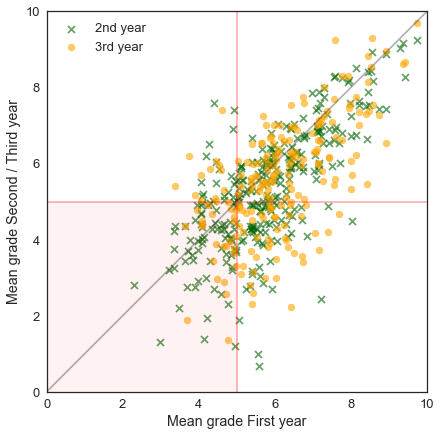

In [5]:
_ds = ma_grades_all.copy()

# _ds = _ds[s1_mates_tag + s2_mates_tag]

# _ds['mean'] = _ds.mean(axis=1)

_x = _ds.iloc[:,0:10].mean(axis=1)
_y = _ds.iloc[:,10:20].mean(axis=1)
_z = _ds.iloc[:,20:30].mean(axis=1)


sns.set_style("white")

f = plt.figure(figsize=[7,7])
ax1 = f.add_subplot(111, aspect='equal')

plt.ylim([0,10])
plt.xlim([0,10])

plt.xlabel("Mean grade First year")
plt.ylabel("Mean grade Second / Third year")

plt.scatter(_x, _y, color="darkgreen", marker="x", alpha=.6)
plt.scatter(_x, _z, color="orange", alpha=.6)

plt.legend(['2nd year', '3rd year'])

# for x,(y,z) in zip(_x, zip(_y, _z)):
#     plt.plot([x, z], [y, z], alpha=0.1)

plt.plot([0,10],[0,10], color="black", alpha=.3)
plt.plot([0,10],[5,5], color="red", alpha=.3)
plt.plot([5,5],[0,10], color="red", alpha=.3)

ax1.add_patch(
    patches.Rectangle(
        (0, 0), 5, 5, color="red", alpha=0.05
    )
)
# plt.axhspan(0,5, color='red', alpha=0.05)


# plt.figure(figsize=[7,7])
# plt.hist(_ds.iloc[:,0:10].stack().ravel(), density=True, range=[0,10])
# plt.hist(_ds.iloc[:,0:10].stack().ravel(), histtype="step", density=True, range=[0,10])
# plt.hist(_y.dropna(), density=True, range=[0,10])
# plt.hist(_z.dropna(), density=True, range=[0,10])

# plt.figure(figsize=[16,8])
# sns.violinplot(data=cs_grades_all.iloc[:,20:30])
;

## Helper Functions



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics

def train_and_predict(model, X_train, Y_train, X_test, Y_test):
    columns = Y_test.columns
    
    Y_pred = pd.DataFrame(index=Y_test.index)
    
    for subject in columns:
        subject = [subject]
        model.fit(X_train, Y_train[subject])
        partial_pred = pd.DataFrame(model.predict(X_test), index=Y_test[subject].index, columns=subject)
        Y_pred[subject] = partial_pred
        
        
    return Y_pred
  

def fit_and_predict_model(model, XY, X_labels, Y_labels, train_size=0.2):
    ''' Split in train and test, train model and run predictions for all output vectors '''
    train, test = train_test_split(XY, random_state=0, train_size=train_size)
    X_train = train[X_labels]
    Y_train = train[Y_labels]
    X_test = test[X_labels]
    Y_test = test[Y_labels]
    
    Y_pred = train_and_predict(model, X_train, Y_train, X_test, Y_test)

    # # Quantize prediction to nearest .5
    # Y_pred = (Y_pred * 2).round(0) / 2

    return X_test, Y_test, Y_pred


def fit_and_predict_model_loo(model, XY, X_labels, Y_labels):
    ''' Fit model on N-1 samples and Predict last sample '''
    
    loo = LeaveOneOut()
    
    X = XY[X_labels]
    Y = XY[Y_labels]
    
    nsplits = loo.get_n_splits(X)
    
    Y = XY[Y_labels]
    
    Y_pred = pd.DataFrame(columns=Y.columns)
    split = 1
    
    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        Y_pred_sample = train_and_predict(model, X_train, Y_train, X_test, Y_test)
        
        Y_pred = pd.concat([Y_pred, Y_pred_sample])
        
        split += 1
        
    return Y_pred

def plot_real_vs_predicted(Y_real, Y_pred):
    f = plt.figure(figsize=[12,8])
    plt.title("Real vs Predicted Scatter")

    plt.plot([0,10], [0,10], color="green", alpha=0.3)
    plt.plot([0,10], [5,5], color="red", alpha=0.3)

    plt.xlabel("Real Grade")
    plt.ylabel("Predicted Grade")
    
    _x = Y_real.stack()
    _y = Y_pred.stack()[_x.index]

    plt.scatter(_x.ravel(), _y.ravel(), alpha=0.5, marker=".")

    f = plt.figure(figsize=[12,3])
    plt.title("Histogram")

    plt.hist(Y_real.stack(), alpha=0.4, color="blue", bins=20, range=[0,10], density=True)
    plt.hist(Y_pred.stack(), alpha=0.4, color="yellow", bins=20, range=[0,10], density=True)
    
    plt.legend(['Real Grade', 'Predicted Grade'])
    
def prediction_metrics(Y_real, Y_pred, verbose=True):
    err     = (Y_real - Y_pred)
    bias    = err.mean().mean()
    err_std = err.std().mean()
    mae     = (err).abs().mean().mean()
    rmse    = np.sqrt((err*err).mean()).mean()    
    
    if verbose:
        print "BIAS     ", bias
        print "ERR STD  ", err_std
        print "MAE      ", mae
        print "RMSE     ", rmse

    return bias, err_std, mae, rmse

    

## Baseline model: Mean Predictor

In [7]:
# dataset = cs_grades_all
# labels_x = s1_info_tag
# labels_y = s2_info_tag

dataset = ma_grades_all
labels_x = s1_mates_tag
labels_y = s2_mates_tag

# dataset = lw_grades_all
# labels_x = s1_dret_tag
# labels_y = s2_dret_tag

item_mean = dataset[labels_y].mean()
user_mean = dataset[labels_x].mean(axis=1)

def predict_ss_mean_item(sid, subj):
    return item_mean[subj]

def predict_ss_mean_user(sid, subj):
    return user_mean[sid]
    
def predict_row(row, fn):
    sid = row.name
    pred_row = pd.Series(index=row.index)
    for subj, _ in row.iteritems():
        pred_row[subj] = fn(sid, subj)
        
    return pred_row

Y_pred = dataset[labels_y].apply(lambda x: predict_row(x, predict_ss_mean_item), axis=1)
print "Item Mean"
prediction_metrics(dataset[labels_y], Y_pred)

print ""

Y_pred = dataset[labels_y].apply(lambda x: predict_row(x, predict_ss_mean_user), axis=1)
print "User Mean"
prediction_metrics(dataset[labels_y], Y_pred);

Item Mean
BIAS      6.41912899615e-16
ERR STD   1.89981057367
MAE       1.48983755809
RMSE      1.8958768278

User Mean
BIAS      -0.440706687955
ERR STD   1.53945660297
MAE       1.37380524069
RMSE      1.76583285846


## Various Models Evaluated

In [6]:
# Set dataset to use here
dataset       = ma_grades_fill
dataset_clean = ma_grades
dataset_all   = ma_grades_all
x_labels      = s1_mates_tag
y_labels      = s2_mates_tag
X_real    = raw_grades_mates[x_labels]
Y_real    = raw_grades_mates[y_labels]

# dataset       = law_grades_fill
# dataset_clean = law_grades
# dataset_all   = law_grades_all
# x_labels      = s1_dret_tag
# y_labels      = s2_dret_tag
# X_real    = raw_grades_dret[x_labels]
# Y_real    = raw_grades_dret[y_labels]

### Linear: LR Weighted Correlation

BIAS      -0.435724831365
ERR STD   1.52936729112
MAE       1.36433414985
RMSE      1.75324407356


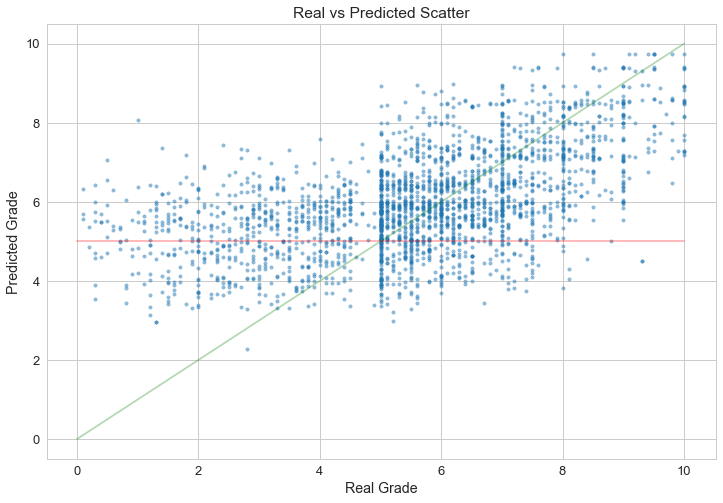

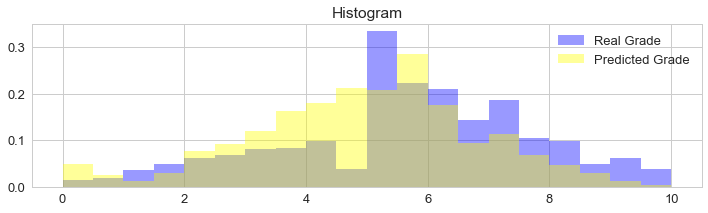

In [7]:
corrs = dataset_clean[x_labels + y_labels].corr()[x_labels]

def predict_student_subject(sid, subj):
    pred = 0
    tw = 0
    
    for s, c in corrs.loc[subj].iteritems():
        g = X_real.loc[sid][s]
        
        if np.isnan(g):
            continue
            
        w = g * c
        pred += w
        tw += c

    if tw == 0:
        return np.nan
    return pred / tw

def predict_row(row):
    sid = row.name
    pred_row = pd.Series(index=row.index)
    for subj, _ in row.iteritems():
        pred_row[subj] = predict_student_subject(sid, subj)
        
    return pred_row

corr_pred = Y_real.apply(predict_row, axis=1)

prediction_metrics(Y_real, corr_pred)
plot_real_vs_predicted(Y_real, corr_pred)

### Non-Linear: KNeighbors

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(weights="distance", n_jobs=-1)
knn_pred = fit_and_predict_model_loo(knn, dataset, x_labels, y_labels)

In [ ]:
prediction_metrics(Y_real, knn_pred)
plot_real_vs_predicted(Y_real, knn_pred)

### Linear Model: Bayesian Ridge

In [9]:
from sklearn import linear_model

br = linear_model.BayesianRidge()
br_pred = fit_and_predict_model_loo(br, dataset, x_labels, y_labels)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BIAS      -0.0229065992498
ERR STD   1.44194882558
MAE       1.12532745442
RMSE      1.43896689308


''

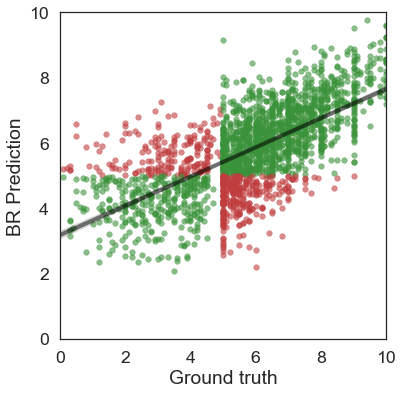

In [25]:
prediction_metrics(Y_real, br_pred)
# plot_real_vs_predicted(Y_real, br_pred)
sns.set_style("white")
sns.set_context("poster", font_scale=1.1)

_x = Y_real.stack()
_y = br_pred.stack()[_x.index]


f = plt.figure(figsize=[10,6])
ax1 = f.add_subplot(111, aspect='equal')

# plt.axhspan(0,5, color="red", alpha=0.1)
plt.xlim(0,10)
plt.ylim(0,10)

# ax1.add_patch(patches.Rectangle((0, 0), 5, 5, color="green", alpha=0.05))
# ax1.add_patch(patches.Rectangle((5, 5), 5, 5, color="green", alpha=0.05))
# ax1.add_patch(patches.Rectangle((5, 0), 5, 5, color="red", alpha=0.05))
# ax1.add_patch(patches.Rectangle((0, 5), 5, 5, color="red", alpha=0.05))

marker_alpha = 0.6

plt.scatter(_x.where(_x < 5), _y.where(_y >= 5), marker=".", color="#c03d3e", alpha=marker_alpha)
plt.scatter(_x.where(_x < 5), _y.where(_y < 5), marker=".", color="#3a923a", alpha=marker_alpha)
plt.scatter(_x.where(_x >= 5), _y.where(_y >= 5), marker=".", color="#3a923a", alpha=marker_alpha)
plt.scatter(_x.where(_x >= 5), _y.where(_y < 5), marker=".", color="#c03d3e", alpha=marker_alpha)

# plt.scatter(_x[_x < 5], _y[_x < 5], marker=".", color="red", alpha=0.5)
# plt.scatter(_x[_x >= 5], _y[_x >= 5], marker=".", color="green", alpha=0.5)

sns.regplot(_x,_y, marker=".", scatter_kws={'alpha':0}, line_kws={'color':"black", 'alpha':.5})

# plt.plot([0,10],[0,10], color="black", alpha=0.3)
# plt.plot([0,10],[5,5], color="black", alpha=0.1)
# plt.plot([5,5],[0,10], color="black", alpha=0.1)

plt.xlabel("Ground truth")
plt.ylabel("BR Prediction")

plt.xticks(range(0,11,2))

# plt.figure(figsize=[7,7])
# _x.hist(density=True, range=[0,10], ec="black", fill=False)
# _y.hist(density=True, range=[0,10], ec="black", fc="black", alpha=0.1)
# plt.ylabel("Density")
# plt.xlabel("Grade bin")
# plt.grid(False)
;
# _y[_x < 5 & _y >= 5].count()

# print "valid pass", _x.where(_x >= 5).where(_y >= 5).count()
# print "valid fail", _x.where(_x < 5).where(_y < 5).count()

# print "total", _x.count()

# sns.despine()

# plt.figure(figsize=[6.75,1])
# sns.distplot(_y.dropna())

# sns.despine(left=True)
# plt.yticks([])
# plt.xticks(rotation=90)

# plt.figure(figsize=[6.75,1])
# sns.distplot(_x.dropna())

# sns.despine(left=True)
# plt.yticks([])

# sns.jointplot(_x, _y, marker=".", kind="reg", color="gray", size=7)

# plt.figure(figsize=[2,7])
# sns.set_style("white")
# dat = pd.DataFrame([br_pred.stack().ravel(), Y_real.stack().ravel()])
# dat = dat.transpose()
# dat.columns = ['pred', 'real']
# sns.violinplot(x='pred', y='real', data=dat, split=True, orient="v")
# sns.despine(left=True, bottom=True)

# plt.yticks([])



### Ensemble Model: AdaBoost

In [135]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada_pred = fit_and_predict_model_loo(ada, dataset, x_labels, y_labels)

In [ ]:
prediction_metrics(Y_real, ada_pred)
plot_real_vs_predicted(Y_real, ada_pred)

### Ensemble Model: RandomForestRegressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_pred  = fit_and_predict_model_loo(rf, dataset, x_labels, y_labels)

C:\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


BIAS      0.0457175836803
ERR STD   1.48543860473
MAE       1.01322369926
RMSE      1.48589449182


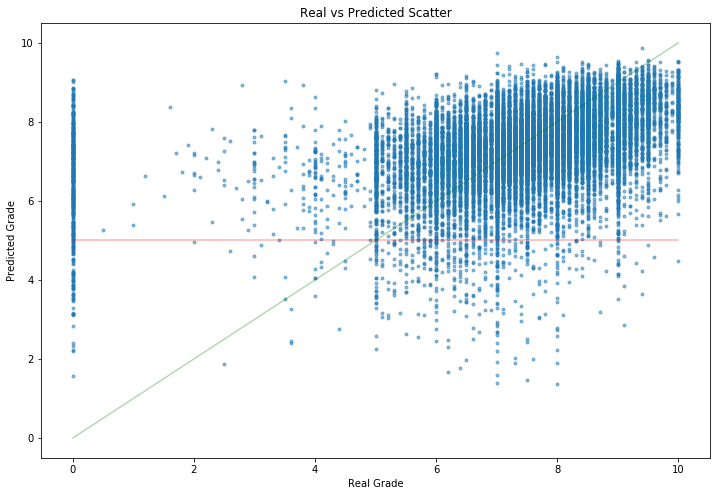

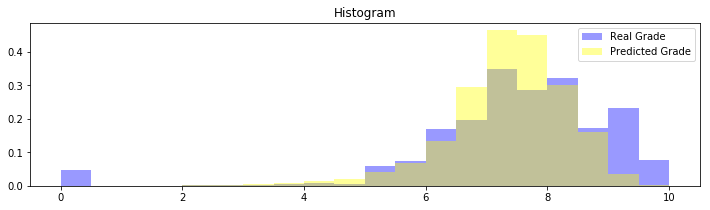

In [80]:
prediction_metrics(Y_real, rf_pred)
plot_real_vs_predicted(Y_real, rf_pred)

### Ensemble Model: GradientBoostingRegressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_pred  = fit_and_predict_model_loo(gb, dataset, x_labels, y_labels)

In [ ]:
prediction_metrics(Y_real, gb_pred)
plot_real_vs_predicted(Y_real, gb_pred)

## Visualization of Predicted Grades by Best Model

In [ ]:
model = linear_model.BayesianRidge()

X_train, Y_train = cs_grades[s1_info_tag], cs_grades[s2_info_tag]

cs_grades_fill = cs_grades_fill.fillna(cs_grades.mean())

X_test, Y_test = cs_grades_fill[s1_info_tag], cs_grades_fill[s2_info_tag]
X_test, Y_test = cs_grades_fill[s1_info_tag], cs_grades_fill[s2_info_tag]

Y_pred = train_and_predict(model, X_train, Y_train, X_test, Y_test)
Y_pred = (Y_pred * 4).round(0) / 4

# for subj in Y_pred.columns:

#     plt.figure(figsize=[16,2])
#     plt.title(subj)
#     # Y_test['ELEC'].plot()
#     plt.scatter(range(len(Y_test)), Y_test[subj].sort_values())
#     plt.scatter(range(len(Y_pred)), Y_pred[subj].sort_values())


## Pass or Fail Future Subject KNN Classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

csg_train, csg_test = train_test_split(cs_grades, random_state=0)
X_train = csg_train[s1_info_tag]
Y_train = csg_train[s2_info_tag]
X_test = csg_test[s1_info_tag]
Y_test = csg_test[s2_info_tag]

# Convert to two factor
Y_train = Y_train.apply(lambda x : x >= 5)
Y_test = Y_test.apply(lambda x : x >= 5)

knn = KNeighborsClassifier(weights="distance")
knn.fit(X_train, Y_train)

Y_pred = pd.DataFrame(knn.predict(X_test), index=X_test.index, columns=Y_test.columns)

def eval_class(Y_test, Y_pred):
    err = Y_test != Y_pred
    
    matrixes = []
    for col in Y_pred.columns:
        cm = metrics.confusion_matrix(Y_test[col], Y_pred[col]).ravel()
        if cm.shape[0] == 1:
            cm = np.array( [0, 0, 0, cm[0] ])
        matrixes += [cm]

    tn, fp, fn, tp = sum(matrixes)

    prec   = float(tp) / (tp + tn)
    recall  = float(tp) / (tp + fn)
    f1     = 2. / (1./recall + 1./prec)

    mean_error = err[err == True].count() / err.count()
    
    cm = [[tp, fp],
          [fn, tn]]
    
    cm = pd.DataFrame(cm, index=['Pred True', 'Pred False'], columns=['Real True','Real False'])

    print "Precision", prec.mean()
    print "Recall", recall.mean()
    print "F1", f1.mean()
    print "Mean Error", mean_error.mean()
    
    return cm

print "Classification Report"
print metrics.classification_report(Y_test, Y_pred)

eval_class(Y_test, Y_pred)

## Pass or Fail Future Subject Random Forest Clasifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, Y_train)

Y_pred = pd.DataFrame(rf.predict(X_test), index=X_test.index, columns=Y_test.columns)

eval_class(Y_test, Y_pred)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
# bag = BaggingClassifier()
# grad = GradientBoostingClassifier()

# Y_pred = fit_and_predict_model(X_train, Y_train, X_test, Y_test)
# eval_class(Y_test, Y_pred)